In [98]:
%run "../../PyUtils/common.ipynb"

han1="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20patient_data_table";
hand="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20hand"
kimj="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20kimj";
leeh="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20leeh";
sony="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20sony";
kuky="http://www.smartconnectedhealth.org/aura/webroot/db.jsp?q=SELECT%20*%20FROM%20kuky";

fileName = kimj;

dfOriginal = LoadDataSet(fileName, checkForDateTime=False);
display (dfOriginal[0:4] )
#for c in dfOriginal.columns: print (c,  end=', ')

<IPython.core.display.Javascript object>

,cname,ampm,timeofday,dateofmeasure,pef1,pef2,pef3,pefmax,indexpef,so2,co,o3,no2,pm10,so2poi,copoi,o3poi,no2poi,pm10poi,temperaturec,rainfallmm,windspeedms,precipitationpercent,vaporpressurehpa,dewpointtemperaturec,airpressurehpa,sealevelpressurehpa,groundtemperaturec,temperaturecpoi,rainfallmmpoi,windspeedmspoi,precipitationpercentpoi,vaporpressurehpapoi,dewpointtemperaturecpoi,airpressurehpapoi,sealevelpressurehpapoi,groundtemperaturecpoi,winddirection,winddirectionpoi,tmax,amax,pmax,tmin,amin,pmin,tmode,amode,pmode,tmaxlesstmin,amaxlessamin,pmaxlesspmin,tmaxpoi,amaxpoi,pmaxpoi,tminpoi,aminpoi,pminpoi,tmodepoi,amodepoi,pmodepoi,tmaxlesstminpoi,amaxlessaminpoi,pmaxlesspminpoi,so2max,so2maxtime,so2min,so2mintime,comax,comaxtime,comin,comintime,o3max,o3maxtime,o3min,o3mintime,no2max,no2maxtime,no2min,no2mintime,pm10max,pm10maxtime,pm10min,pm10mintime,so2maxpoi,so2maxtimepoi,so2minpoi,so2mintimepoi,comaxpoi,comaxtimepoi,cominpoi,comintimepoi,o3maxpoi,o3maxtimepoi,o3minpoi,o3mintimepoi,no2maxpoi,no2maxtimepoi,no2minpoi,no2mintimepoi,pm10maxpoi,pm10maxtimepoi,pm10minpoi,pm10mintimepoi
0,kimj,am,05:47:00,2015-02-05,121.000,98.000,112.000,121.000,R,0.216,29.800,0.407,1.264,2168.000,0.309,30.200,0.321,1.185,2490.000,-1.900,0.981,1.800,68.000,3.600,-7.000,1018.000,1022.400,-1.800,-1.900,1.008,2.500,96.000,5.100,-2.400,1013.500,1022.600,0.000,320,340.000,5.100,1020.900,99.000,-4.400,1000.000,36.000,0.300,1017.900,98.000,9.500,20.900,63.000,4.200,1015.900,99.000,-2.300,1000.000,66.000,1.300,1015.700,99.000,6.500,15.900,33.000,0.014,13.000,0.004,5.000,1.800,22.000,0.900,15.000,0.037,17.000,0.002,4.000,0.084,10.000,0.020,2.000,141.000,21.000,62.000,7.000,0.019,12.000,0.007,5.000,1.700,7.000,0.900,3.000,0.030,3.000,0.002,5.000,0.069,7.000,0.022,3.000,128.000,1.000,77.000,5.000
1,kimj,am,06:09:00,2015-02-06,85.000,75.000,68.000,85.000,R,0.241,19.400,0.618,0.889,2127.000,0.279,22.100,0.395,1.087,2495.000,-4.700,0.981,0.500,93.000,4.000,-5.600,1021.900,1026.300,-2.800,-2.500,1.008,0.900,79.000,4.000,-5.600,1016.800,1026.000,-0.600,110,290.000,4.700,1021.900,91.000,-4.400,1000.000,42.000,1.200,1021.500,45.000,9.100,21.900,49.000,3.500,1017.100,93.000,-2.600,1000.000,62.000,-2.200,1014.400,79.000,6.100,17.100,31.000,0.018,11.000,0.006,20.000,1.100,11.000,0.500,4.000,0.041,14.000,0.006,9.000,0.057,9.000,0.015,3.000,125.000,12.000,57.000,4.000,0.018,14.000,0.007,23.000,1.200,9.000,0.700,2.000,0.031,3.000,0.004,6.000,0.064,18.000,0.019,3.000,127.000,14.000,77.000,5.000
2,kimj,am,06:34:00,2015-02-07,113.000,123.000,114.000,123.000,R,0.168,17.600,0.275,1.166,1262.000,0.244,20.900,0.229,1.179,1720.918,-1.900,0.981,0.800,91.000,4.900,-3.100,1018.900,1023.300,-1.300,0.300,1.008,2.300,97.000,6.100,-0.100,1013.900,1023.000,0.100,200,200.000,6.100,1023.000,94.000,-4.700,1000.000,44.000,-1.900,1021.400,92.000,10.800,23.000,50.000,4.200,1018.000,96.000,-2.800,1000.000,67.000,0.300,1016.700,81.000,7.000,18.000,29.000,0.012,10.000,0.004,19.000,1.300,9.000,0.400,14.000,0.033,15.000,0.002,22.000,0.069,9.000,0.019,15.000,81.000,9.000,34.000,17.000,0.015,12.000,0.007,5.000,1.200,9.000,0.500,14.000,0.031,3.000,0.010,5.000,0.069,1.000,0.019,3.000,92.000,9.000,47.459,19.000
3,kimj,am,09:26:00,2015-02-08,98.000,104.000,128.000,128.000,R,0.152,11.700,0.669,0.498,1683.000,0.223,14.000,0.455,0.703,1527.000,-9.800,0.981,4.600,33.000,1.000,-23.000,1022.700,1027.200,-4.100,-11.100,1.008,6.800,48.000,1.300,-19.900,1018.200,1027.700,-3.100,320,360.000,5.100,1022.200,86.000,-10.400,1000.000,32.000,5.100,1015.600,32.000,15.500,22.200,54.000,5.700,1017.500,99.000,-11.200,1000.000,45.000,3.800,1010.800,96.000,16.900,17.500,54.000,0.012,11.000,0.002,7.000,1.300,9.000,0.200,2.000,0.040,17.000,0.003,9.000,0.072,9.000,0.002,3.000,174.000,8.000,30.000,12.000,0.014,14.000,0.006,7.000,0.900,22.000,0.400,2.000,0.028,18.000,0.002,9.000,0.053,11.000,0.008,5.000,94.000,8.000,37.000,22.000


In [99]:
df=dfOriginal.copy()
df.insert(4, 'npt',0)
df.insert(4, 'pef',0)
df.npt = pd.notnull(df.pef1)*1 + pd.notnull(df.pef2)*1 + pd.notnull(df.pef3)*1
df = df[df.npt > 0]
df=df.reset_index(drop=True)
df.pef = (df.pef1 + df.pef2 + df.pef3)/df.npt

df=df.fillna(0)
df.loc[df.timeofday == 'null', 'timeofday'] = "00:00:00"
sdttm = df.dateofmeasure + " " + df.timeofday
df.insert(0, 'sdttm', sdttm)
df.sdttm = pd.to_datetime(df.sdttm)

df.sort_values(by='sdttm', ascending=True, inplace=True)
drps  = "cname, ampm, timeofday, dateofmeasure, npt, pef1, pef2, pef3, pefmax, indexpef".split(', ')
df=df.drop(drps, axis=1, errors='ignore')
df=df.reset_index(drop=True)

## <== do the following for SAP PA tool
#pef = df.pef;
#df=df.drop(['pef'], axis=1)
#df.insert(1, 'pef1', pef)

#pef[-10:]=0     # Set last 10 to zero for predictions
#df.insert(1, 'pef', pef)

#df.to_csv("HanD/hand1.csv", sep=';')
df1 = df.copy()
df1 = df1.set_index(df1.sdttm)
df

,sdttm,pef,so2,co,o3,no2,pm10,so2poi,copoi,o3poi,no2poi,pm10poi,temperaturec,rainfallmm,windspeedms,precipitationpercent,vaporpressurehpa,dewpointtemperaturec,airpressurehpa,sealevelpressurehpa,groundtemperaturec,temperaturecpoi,rainfallmmpoi,windspeedmspoi,precipitationpercentpoi,vaporpressurehpapoi,dewpointtemperaturecpoi,airpressurehpapoi,sealevelpressurehpapoi,groundtemperaturecpoi,winddirection,winddirectionpoi,tmax,amax,pmax,tmin,amin,pmin,tmode,amode,pmode,tmaxlesstmin,amaxlessamin,pmaxlesspmin,tmaxpoi,amaxpoi,pmaxpoi,tminpoi,aminpoi,pminpoi,tmodepoi,amodepoi,pmodepoi,tmaxlesstminpoi,amaxlessaminpoi,pmaxlesspminpoi,so2max,so2maxtime,so2min,so2mintime,comax,comaxtime,comin,comintime,o3max,o3maxtime,o3min,o3mintime,no2max,no2maxtime,no2min,no2mintime,pm10max,pm10maxtime,pm10min,pm10mintime,so2maxpoi,so2maxtimepoi,so2minpoi,so2mintimepoi,comaxpoi,comaxtimepoi,cominpoi,comintimepoi,o3maxpoi,o3maxtimepoi,o3minpoi,o3mintimepoi,no2maxpoi,no2maxtimepoi,no2minpoi,no2mintimepoi,pm10maxpoi,pm10maxtimepoi,pm10minpoi,pm10mintimepoi
0,2015-02-04 21:33:00,87.000,0.179,28.800,0.253,1.521,1880.000,0.269,29.800,0.202,1.346,2182.000,0.300,0.981,0.700,94.000,5.900,-0.500,1017.900,1022.200,-0.200,1.300,1.008,1.600,99.000,6.600,1.100,1013.000,1022.000,0.200,110,320.000,5.100,1023.300,99.000,-4.400,1000.000,36.000,5.100,1020.700,98.000,9.500,23.300,63.000,4.200,1018.500,99.000,-2.300,1000.000,66.000,-1.900,1015.700,99.000,6.500,18.500,33.000,0.014,13.000,0.004,2.000,1.600,10.000,0.900,15.000,0.037,17.000,0.002,21.000,0.084,10.000,0.030,17.000,111.000,20.000,62.000,7.000,0.019,12.000,0.007,22.000,1.700,7.000,0.900,22.000,0.024,15.000,0.002,7.000,0.069,7.000,0.033,15.000,112.000,11.000,76.000,2.000
1,2015-02-05 05:47:00,110.333,0.216,29.800,0.407,1.264,2168.000,0.309,30.200,0.321,1.185,2490.000,-1.900,0.981,1.800,68.000,3.600,-7.000,1018.000,1022.400,-1.800,-1.900,1.008,2.500,96.000,5.100,-2.400,1013.500,1022.600,0.000,320,340.000,5.100,1020.900,99.000,-4.400,1000.000,36.000,0.300,1017.900,98.000,9.500,20.900,63.000,4.200,1015.900,99.000,-2.300,1000.000,66.000,1.300,1015.700,99.000,6.500,15.900,33.000,0.014,13.000,0.004,5.000,1.800,22.000,0.900,15.000,0.037,17.000,0.002,4.000,0.084,10.000,0.020,2.000,141.000,21.000,62.000,7.000,0.019,12.000,0.007,5.000,1.700,7.000,0.900,3.000,0.030,3.000,0.002,5.000,0.069,7.000,0.022,3.000,128.000,1.000,77.000,5.000
2,2015-02-05 21:34:00,79.333,0.276,24.400,0.574,0.981,2531.000,0.313,25.700,0.378,1.108,2784.000,0.100,0.981,1.500,78.000,4.800,-3.200,1021.000,1025.300,-0.300,0.200,1.008,4.300,85.000,5.300,-2.000,1016.300,1025.400,0.100,250,320.000,4.700,1020.700,97.000,-3.300,1000.000,42.000,0.300,1017.900,67.000,8.000,20.700,55.000,3.500,1015.900,99.000,-2.600,1000.000,62.000,1.300,1013.500,88.000,6.100,15.900,37.000,0.018,11.000,0.006,20.000,1.800,22.000,0.700,16.000,0.041,14.000,0.003,22.000,0.075,22.000,0.020,2.000,141.000,21.000,81.000,20.000,0.018,14.000,0.009,20.000,1.400,21.000,0.800,16.000,0.030,3.000,0.004,6.000,0.064,18.000,0.022,3.000,128.000,1.000,91.000,20.000
3,2015-02-06 06:09:00,76.000,0.241,19.400,0.618,0.889,2127.000,0.279,22.100,0.395,1.087,2495.000,-4.700,0.981,0.500,93.000,4.000,-5.600,1021.900,1026.300,-2.800,-2.500,1.008,0.900,79.000,4.000,-5.600,1016.800,1026.000,-0.600,110,290.000,4.700,1021.900,91.000,-4.400,1000.000,42.000,1.200,1021.500,45.000,9.100,21.900,49.000,3.500,1017.100,93.000,-2.600,1000.000,62.000,-2.200,1014.400,79.000,6.100,17.100,31.000,0.018,11.000,0.006,20.000,1.100,11.000,0.500,4.000,0.041,14.000,0.006,9.000,0.057,9.000,0.015,3.000,125.000,12.000,57.000,4.000,0.018,14.000,0.007,23.000,1.200,9.000,0.700,2.000,0.031,3.000,0.004,6.000,0.064,18.000,0.019,3.000,127.000,14.000,77.000,5.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

Index(['sdttm', 'pef', 'so2', 'co', 'o3', 'no2', 'pm10', 'so2poi', 'copoi', 'o3poi', 'no2poi', 'pm10poi', 'temperaturec', 'rainfallmm', 'windspeedms', 'precipitationpercent', 'vaporpressurehpa', 'dewpointtemperaturec', 'airpressurehpa', 'sealevelpressurehpa', 'groundtemperaturec', 'temperaturecpoi', 'rainfallmmpoi', 'windspeedmspoi', 'precipitationpercentpoi', 'vaporpressurehpapoi', 'dewpointtemperaturecpoi', 'airpressurehpapoi', 'sealevelpressurehpapoi', 'groundtemperaturecpoi', 'winddirection', 'winddirectionpoi', 'tmax', 'amax', 'pmax', 'tmin', 'amin', 'pmin', 'tmode', 'amode', 'pmode', 'tmaxlesstmin', 'amaxlessamin', 'pmaxlesspmin', 'tmaxpoi', 'amaxpoi', 'pmaxpoi', 'tminpoi', 'aminpoi', 'pminpoi', 'tmodepoi', 'amodepoi', 'pmodepoi', 'tmaxlesstminpoi', 'amaxlessaminpoi', 'pmaxlesspminpoi', 'so2max', 'so2maxtime', 'so2min', 'so2mintime', 'comax', 'comaxtime', 'comin', 'comintime', 'o3max', 'o3maxtime', 'o3min', 'o3mintime', 'no2max', 'no2maxtime', 'no2min', 'no2mintime', 'pm10max',
 

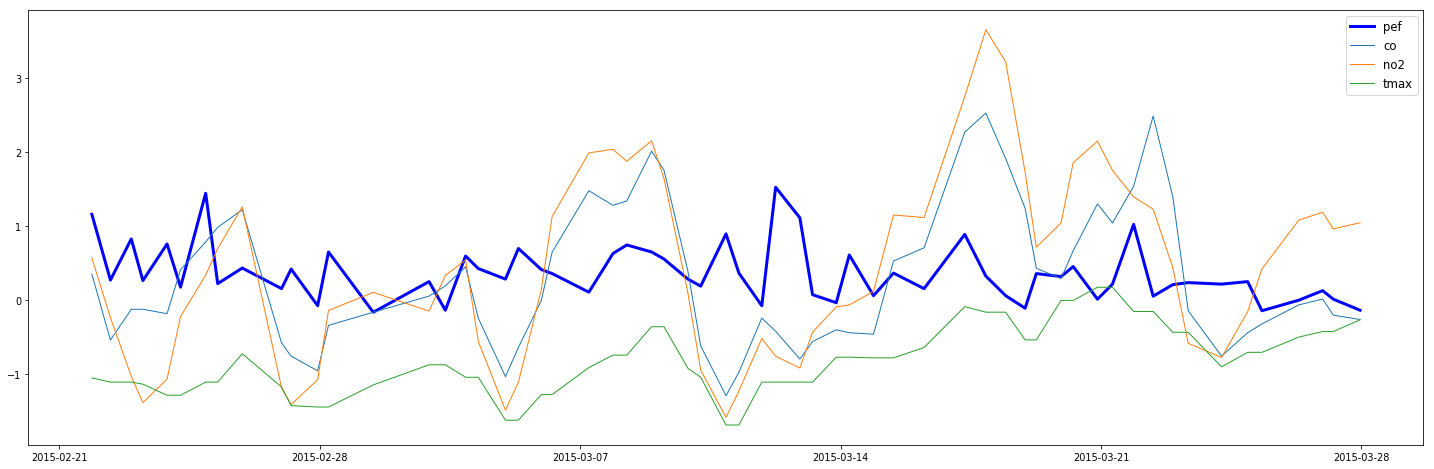

In [108]:
print(df1.columns)

scaler = StandardScaler()
dp = prepareDF(df1, True)
for c in dp.columns:
    dp[c] = scaler.fit_transform(dp[c])

plt.figure(figsize=(25, 8))
plt.rc('font', size=14)

dp = dp[30:90]
dp = dp["so2,pef,co,o3,no2,pm10,tmax,so2poi,copoi,o3poi,no2poi,pm10poi,temperaturec".split(',')]
rolmean = pd.rolling_mean(dp.pef, window=12)

plt.plot(dp.index, dp.pef, color='b', linewidth=3)
#plt.plot(dp.index, rolmean, color='r', linewidth=2, label='trend')
#plt.plot(dp.index, dp.so2)
plt.plot(dp.index, dp.co)
#plt.plot(dp.index, dp.o3)
plt.plot(dp.index, dp.no2)
#plt.plot(dp.index, dp.pm10)
plt.plot(dp.index, dp.tmax)
#plt.plot(dp.index, dp.amax)
#plt.plot(dp.index, dp.pmax)

plt.legend()

In [ ]:
#display(HTML(dp.to_html()) )


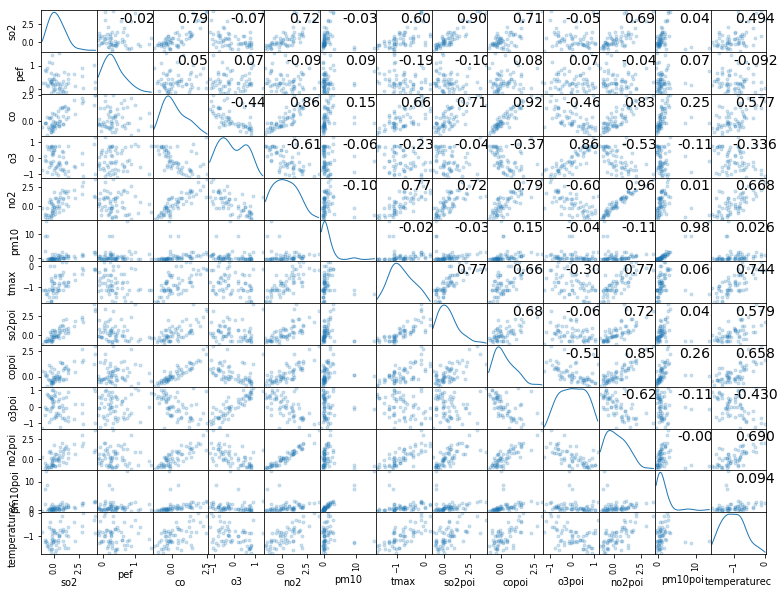

In [109]:
c="r,g,b,c,m,y,k,w".split(",")
axes = scatter_matrix(dp, alpha=0.2, diagonal='kde', figsize=(13, 10)); # diagonal can be 'hist';

corr = dp.corr().as_matrix()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()


In [111]:
def run_reg(X,y,reg_class,printDebug = False , reg=None):
    # Construct a kfolds object
    kf = sklearn.model_selection.KFold(n_splits=5, shuffle=True)
    y_pred = y.copy()

    # Iterate through folds\
    i = 0;
    for train_index, test_index in kf.split(X):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        # Initialize a classifier with key word arguments
        clf = reg_class(**kwargs) if (reg is None)  else reg;
        if (printDebug): print ("*",i, end ="");
        reg.fit(X_train,y_train)
        y_pred[test_index] = reg.predict(X_test)
        i = i +1;
    if (printDebug): print ("*");
    return y_pred, clf

In [112]:
from sklearn.tree import DecisionTreeRegressor

#dp = dp["so2,pef,o3,co,no2,pm10,tmax".split(',')]

dp1 = dp.set_index(pd.Series(range(0,len(dp)) ) )

X = dp1.ix[:, dp1.columns != 'pef']
y = dp1.pef
X = X.as_matrix().astype(np.float)

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=15)
#regr_1.fit(X, y)
#regr_2.fit(X, y)
y1 = run_reg(X,y, None, True, regr_1)
y2 = run_reg(X,y, None, True, regr_2)

* 0* 1* 2* 3* 4*
* 0* 1* 2* 3* 4*


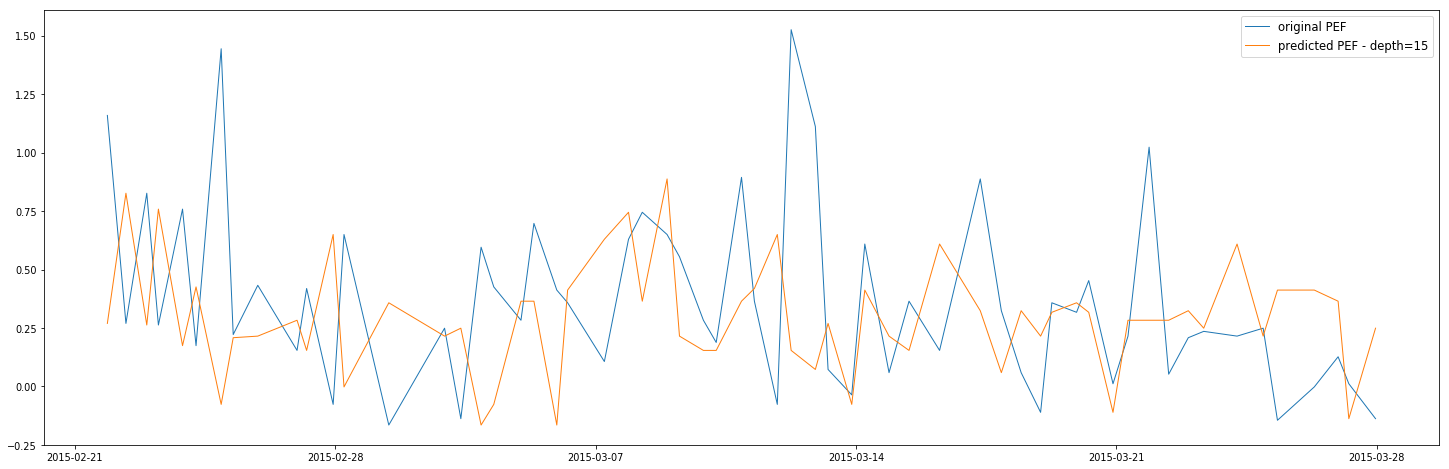

In [113]:
plt.figure(figsize=(25, 8))
plt.plot(dp.index,y, label='original PEF')
#plt.plot(y1[0])
plt.plot(dp.index, y2[0], label='predicted PEF - depth=15')
plt.legend()

In [105]:
display(HTML(dp[15:45].to_html()) )


,so2,pef,co,o3,no2,pm10,tmax
sdttm,,,,,,,
2015-03-03 09:00:00,1.253,-0.138,0.192,-0.307,0.332,0.953,-0.875
2015-03-03 22:04:00,0.415,0.595,0.449,-0.397,0.542,0.309,-1.044
2015-03-04 06:15:00,-0.256,0.426,-0.244,0.298,-0.558,-0.012,-1.044
2015-03-04 23:48:00,-0.360,0.283,-1.036,0.775,-1.489,-0.181,-1.624
2015-03-05 08:09:00,-0.360,0.697,-0.640,0.712,-1.110,-0.186,-1.624
2015-03-05 22:55:00,-0.130,0.412,-0.006,-0.154,0.141,-0.195,-1.278
2015-03-06 05:54:00,0.226,0.358,0.647,-0.922,1.129,-0.157,-1.278
2015-03-07 05:36:00,1.107,0.107,1.479,-1.019,1.990,-0.037,-0.913
2015-03-07 21:11:00,1.400,0.629,1.281,-0.804,2.038,0.023,-0.744


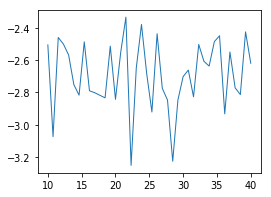

In [106]:
from sklearn.model_selection import cross_val_score
m = list()
ds = np.linspace(10, 40, 40)
for d in (ds):
    r = DecisionTreeRegressor(max_depth=d)
    a = cross_val_score(r, X, y, cv=10)
    m.append(np.mean(a))
    #print(d, a)
    
plt.plot(ds, m)


In [107]:
#np.mean(y1[0] - y)
#r.feature_importances_
r.decision_path

<bound method BaseDecisionTree.decision_path of DecisionTreeRegressor(criterion='mse', max_depth=40.0, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')>